### Importing libraries and dataset

In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import sys
!{sys.executable} -m pip install xgboost

#importing dataset 
df=pd.read_csv("C:/Users/mehmo/Desktop/Predictive analytics/1st assignment/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Summary of dataset

In [157]:
# checking the data to know the variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Summary Statistic of dataset 

In [159]:
#generating the summary statistics 
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Missing values 

In [161]:
# looking for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Finding duplicates

In [163]:
#looking for the duplicates
#df.duplicated.sum()
duplicated_values=df[df.duplicated()]
duplicated_values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


### Mushroom Class Distribution

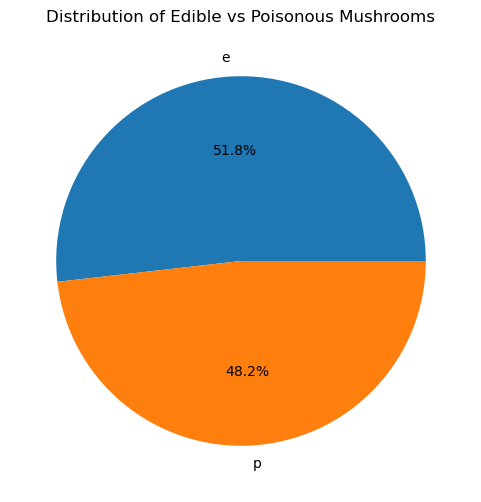

In [165]:
# looking the class distribution
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.ylabel('')
plt.show()

### Distribution of cap-shape, cap-color and cap-surface

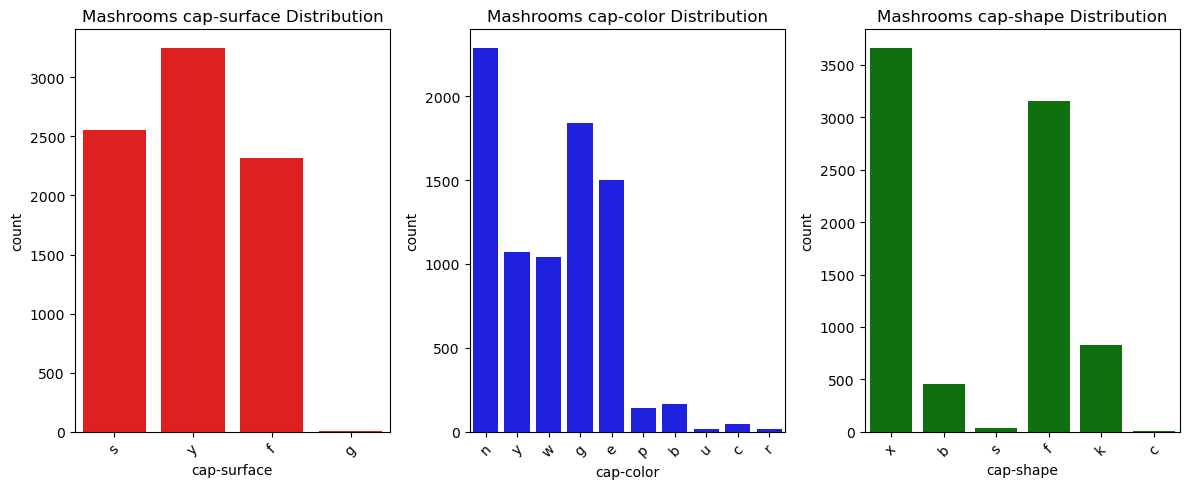

In [167]:
# Distribution of cap shape, cap color and cap surface
fig, axes=plt.subplots(1,3,figsize=(12,5))

# distribution of mushrooms cap surface
sns.countplot(data=df, x='cap-surface', ax=axes[0],color='red')
axes[0].set_title("Mashrooms cap-surface Distribution") 
axes[0].tick_params(axis='x', rotation=45)

# distribution of mushroom cap color 
sns.countplot(data=df, x='cap-color', ax=axes[1], color='blue')
axes[1].set_title('Mashrooms cap-color Distribution')
axes[1].tick_params(axis='x', rotation=45)

# distribution of mashroom cap shape
sns.countplot(data=df, x='cap-shape', ax=axes[2],color='green')
axes[2].set_title('Mashrooms cap-shape Distribution')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Relationship between Odor and Class

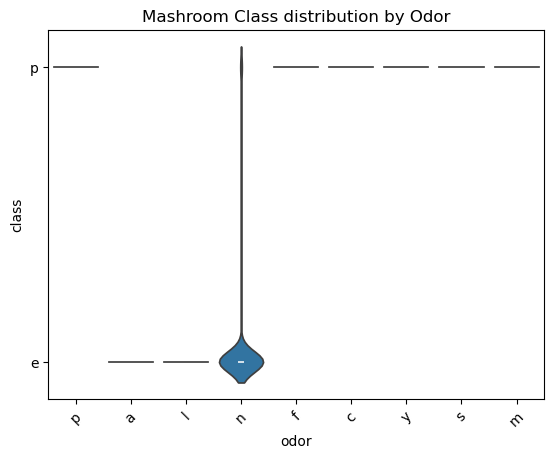

<Figure size 800x400 with 0 Axes>

In [169]:
# looking for the relationship between odor and class
sns.violinplot(x='odor', data=df, y='class') 
plt.title('Mashroom Class distribution by Odor')
plt.xticks(rotation=45)
plt.figure(figsize=(8,4))
plt.show()

### Relationship between Habitat and Class

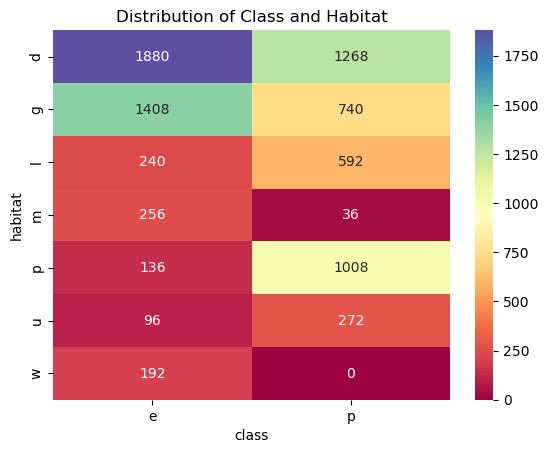

<Figure size 600x600 with 0 Axes>

In [171]:
# Looking for the relationship between Habitat and Class 
habitat_class=pd.crosstab(df['habitat'], df['class'])
sns.heatmap(habitat_class, fmt='d', annot=True, cmap='Spectral')
plt.title('Distribution of Class and Habitat')
plt.figure(figsize=(6,6))
plt.show()

### Relationship between Color and Class

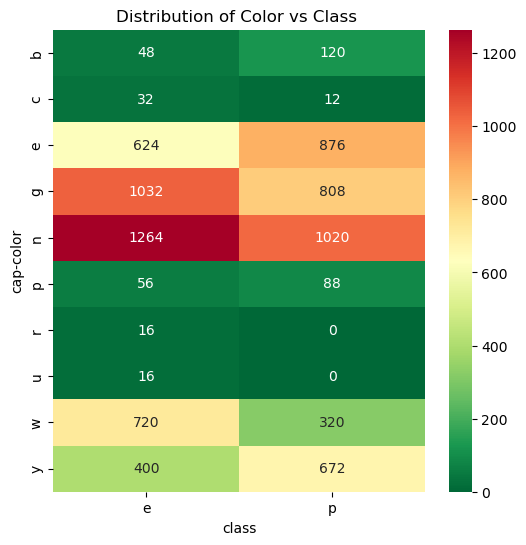

In [173]:
# Looking for the relationship between Color and Class 
habitat_class=pd.crosstab(df['cap-color'], df['class'])
plt.figure(figsize=(6,6))
sns.heatmap(habitat_class, fmt='d', annot=True, cmap='RdYlGn_r')
plt.title('Distribution of Color vs Class ')
plt.show()

### Label Encoding for converting catergorical variable into numerical and finding the correlation

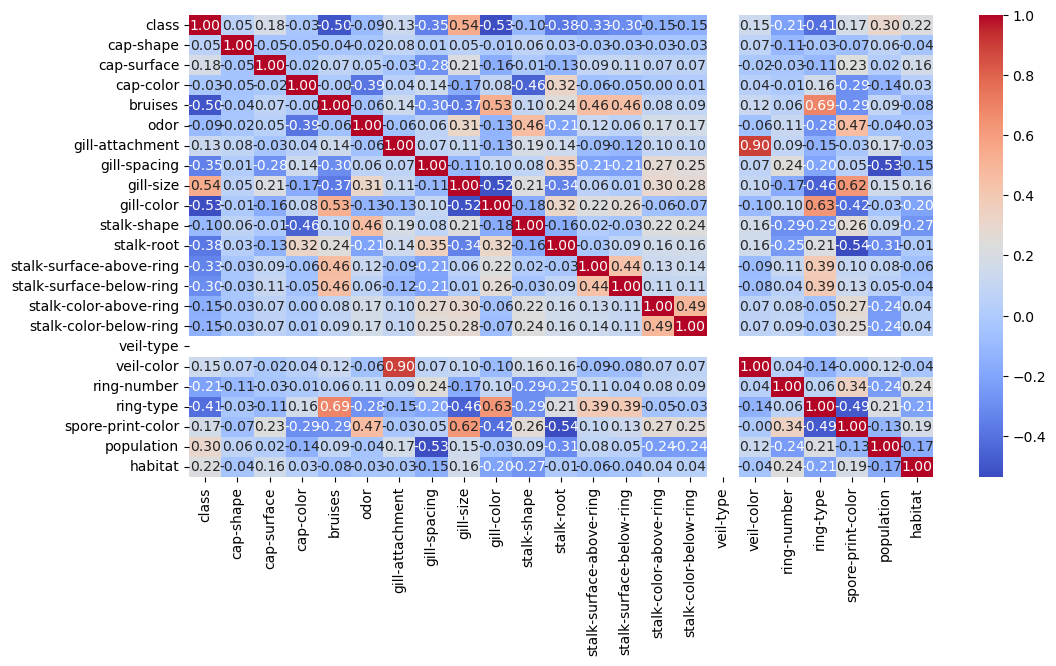

In [175]:
# The dataset of mushrooms we have is categorical form but for correlation  we need numerical data so i will convert this first
categorical_to_numeric = {}
for col in df.columns: 
    value = LabelEncoder()
    df[col]=value.fit_transform(df[col]) 
    categorical_to_numeric[col]=value
#finding the correlation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Gaussian Naive Bayes Model

In [177]:
#Applying machine learning model to predict whether a mushroom is edible or poisonious
# Gaussian Naive Bayes 
# separating the dependent(y) and independent variable(X)
X = df.drop('class', axis=1)
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=45)
#Importing the Gaussian Naive Bayes for making and training the model
g_nb = GaussianNB()
g_nb.fit(X_train, y_train) 
# Now using the model i created to make prediction whether the masroom is edible or poisnious 
prediction = g_nb.predict(X_test) 
# to assess the performance of model i will need classification report and accuracy score 
success_score = accuracy_score(y_test, prediction)
performance_summary = classification_report(y_test, prediction)
print(f"Accuracy: {success_score:.2f}")
print("\nClassification Report:")
print(performance_summary)

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       853
           1       0.89      0.93      0.91       772

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



### Decision Tree Model

In [179]:
# Applying the Decision Tree Algorithm on the Dataset
#Categroical variable are already converted into numerical above, so i don't have to do it again
#dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=50)
# after spliting next step will be the training 
decision_tree_estimator = DecisionTreeClassifier(random_state=50)
decision_tree_estimator.fit(X_train, y_train)
#now i can use the model to make prediction
prediction = decision_tree_estimator.predict(X_test)
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Random Forest Model

In [181]:
# Applying the Random forest  to dataset
# data is already encoded into numeric
# dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=100)
# next step is intializing and training the model
random_forest_classifier = RandomForestClassifier(random_state=100)
random_forest_classifier.fit(X_train, y_train)
#using the model to make prediction
prediction = random_forest_classifier.predict(X_test)
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Logistic Regression

In [183]:
# Now applying Logistic Regression 
#data is already converted into numeric 
# dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=85)
# next step is intializing and training the model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
#using the model to make prediction
prediction = logistic_regression.predict(X_test) 
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)

Accuracy: 0.9446153846153846

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       837
           1       0.96      0.93      0.94       788

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.94      0.94      1625



### Support Vector Classification Model

In [185]:
#Now applying support vector machine/classification to the dataset
# data is already converted into numeric
# dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=90)
# next step is intializing and training the model
support_vector_classification = SVC(kernel='linear') 
support_vector_classification.fit(X_train, y_train)
#using the model to make prediction
prediction = support_vector_classification.predict(X_test)
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)




Accuracy: 0.9796923076923076

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.99      0.97      0.98       769

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### K-Nearest Neibors(KNN) Model

In [187]:
#Now applying K-Nearest Neighbors (KNN) to dataset
# data is already converted into numerics
# dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=150)
# next step is intializing and training the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
#using the model to make prediction
prediction = knn.predict(X_test)
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)


Accuracy: 0.9932307692307693

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       802
           1       0.99      0.99      0.99       823

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### XGBOOST Model

In [189]:
# Now applying the XGBoost to dataset
# dataset already converted into numeric
# dividing the data into dependent(y) and independent variable(X)
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=200)
# next step is intializing and training the model
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=200)
xgboost.fit(X_train, y_train)
#using the model to make prediction
prediction = xgboost.predict(X_test)
# to assess the performance of model i will need classification report and accuracy score 
model_accuracy = accuracy_score(y_test, prediction)
performance_report = classification_report(y_test, prediction)
print(f"Accuracy: {model_accuracy}")
print("\nClassification Report:")
print(performance_report)



Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       1.00      1.00      1.00       795

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Decision Tree model Hyperparameter Tuning and Cross validation

In [191]:
# Decision tree model hyperparameter tunning and cross validation

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# performing cross validation with grid search
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=50),
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
# now using gridsearch to train the decission tree with hyperparameter tunning
dt_grid.fit(X_train, y_train)

# Evaluating the best model 
best_dt = dt_grid.best_estimator_
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5)

# time to display the result
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std CV Accuracy: {np.std(cv_scores):.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean CV Accuracy: 1.0000
Std CV Accuracy: 0.0000


### Random Forest Model Hyperparameter Tuning and Cross validation

In [193]:
# Random forest hyperparameter tunning  and Cross Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Now doing the cross validation with grid search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=100),
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

# now using gridsearch to train the random forest with hyperparameter tunning
rf_grid.fit(X_train, y_train)

#Evaluating the best model
best_rf = rf_grid.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

# time to display the result
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std CV Accuracy: {np.std(cv_scores):.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Mean CV Accuracy: 1.0000
Std CV Accuracy: 0.0000


### XGBOOST model Hyperparameter Tuning and Cross validation

In [195]:
# XGBoost hyperparameter tunning and Cross Validation
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Now doing the cross validation with grid search
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, 
                                     eval_metric='logloss',
                                     random_state=200),
                       param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

# now using gridsearch to train the random forest with hyperparameter tunning
xgb_grid.fit(X_train, y_train)

#Evaluating the best model
best_xgb = xgb_grid.best_estimator_
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5)

# time to display the result
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std CV Accuracy: {np.std(cv_scores):.4f}")

C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.6}
Mean CV Accuracy: 1.0000
Std CV Accuracy: 0.0000


### Decision Tree Feature Importance Analysis

gill-color: 0.3395
spore-print-color: 0.2001
population: 0.1789
gill-size: 0.1205
stalk-root: 0.0561
bruises: 0.0274
habitat: 0.0265
stalk-shape: 0.0264
stalk-color-below-ring: 0.0188
cap-color: 0.0031
stalk-surface-below-ring: 0.0016
ring-number: 0.0011
cap-shape: 0.0000
cap-surface: 0.0000
odor: 0.0000
gill-attachment: 0.0000
gill-spacing: 0.0000
stalk-surface-above-ring: 0.0000
stalk-color-above-ring: 0.0000
veil-type: 0.0000
veil-color: 0.0000
ring-type: 0.0000


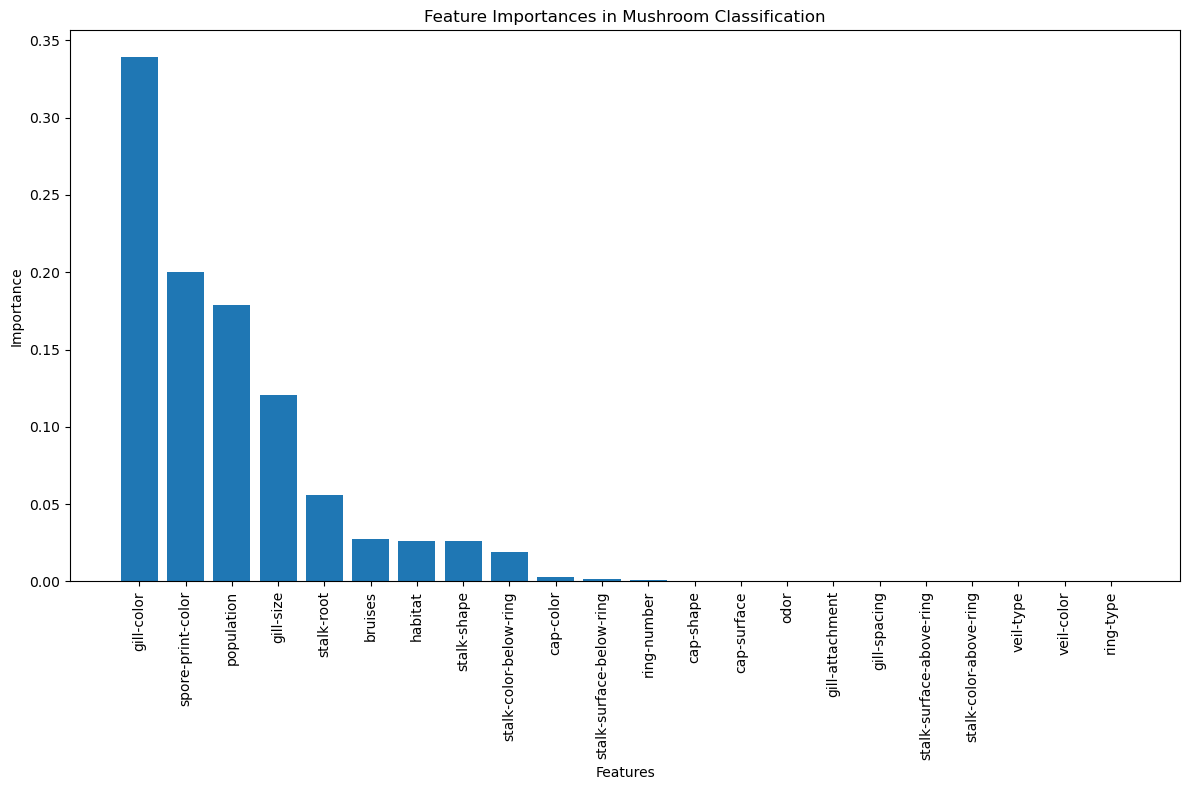

In [197]:
#DECISION TREE FEATURE IMPORTANCE ANALYSIS
#NOW going for Feature importance analysis of mushrooms
# data set is already converted into the numeric above 
# splitting the dependent and indepent variale or we can say features and target variable
X = df.drop('class', axis=1) 
y = df['class']
# Training the model  
decisiontree_model = DecisionTreeClassifier(random_state=55)
decisiontree_model.fit(X_train, y_train)
# Get feature importances
feature_importances = decisiontree_model.feature_importances_

# Maping feature importances to feature names
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Sorting the features
features_sorted = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# printing the sorted features
for feature, importance in features_sorted:
    print(f"{feature}: {importance:.4f}")
#ploting the sorted features
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), [imp for _, imp in features_sorted])
plt.xticks(range(len(feature_importances)), [feat for feat, _ in features_sorted], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Mushroom Classification')
plt.tight_layout()
plt.show()

### Random Forest Feature Importance Analysis

odor: 0.1524
gill-color: 0.1211
gill-size: 0.1124
spore-print-color: 0.0876
stalk-surface-above-ring: 0.0736
stalk-root: 0.0675
ring-type: 0.0657
population: 0.0545
gill-spacing: 0.0529
bruises: 0.0359
stalk-surface-below-ring: 0.0342
habitat: 0.0320
stalk-shape: 0.0280
stalk-color-below-ring: 0.0192
cap-color: 0.0154
ring-number: 0.0143
cap-surface: 0.0112
stalk-color-above-ring: 0.0110
cap-shape: 0.0050
veil-color: 0.0040
gill-attachment: 0.0020
veil-type: 0.0000


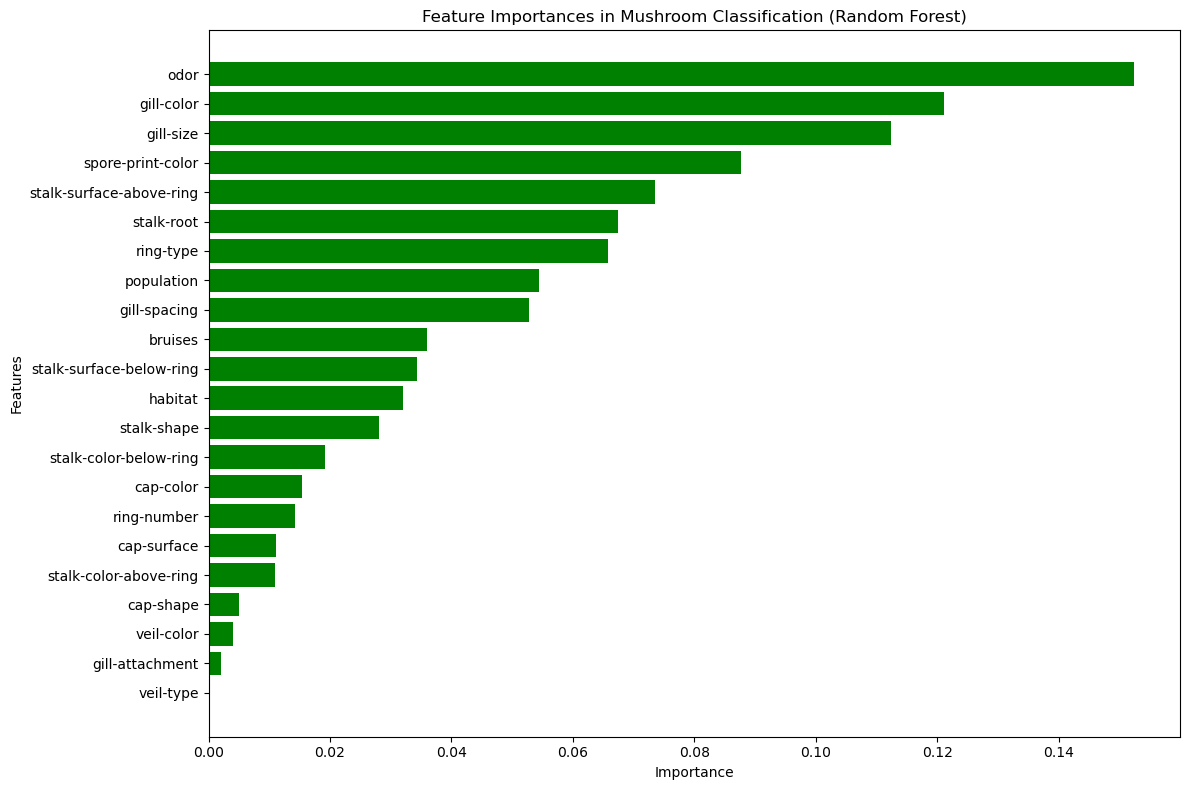

In [199]:
#RANDOM FOREST FEATURE IMPORTANCE ANALYSIS
#NOW going for Feature importance analysis of mushrooms
# data set is already converted into the numeric above 
# splitting the dependent and indepent variale or we can say features and target variable
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Training the model
randomforest_classifier = RandomForestClassifier(random_state=65)
randomforest_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = randomforest_classifier.feature_importances_

# Map feature importances to feature names
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Sorting the  features 
features_sorted = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
# Extracting the names of feature and values on the basis of importance
features = [feature for feature, _ in features_sorted]
importances = [importance for _, importance in features_sorted]

# printing the sorted features
for feature, importance in features_sorted:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='green')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Mushroom Classification (Random Forest)')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### XGBOOST Feature Importance Analysis

C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:42:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


gill-color: 0.4432
population: 0.1503
spore-print-color: 0.0709
stalk-shape: 0.0691
gill-size: 0.0650
stalk-color-above-ring: 0.0534
bruises: 0.0500
odor: 0.0245
stalk-root: 0.0179
habitat: 0.0164
cap-surface: 0.0113
stalk-color-below-ring: 0.0081
stalk-surface-below-ring: 0.0070
ring-number: 0.0051
cap-color: 0.0032
ring-type: 0.0032
stalk-surface-above-ring: 0.0008
cap-shape: 0.0005
gill-spacing: 0.0002
gill-attachment: 0.0000
veil-type: 0.0000
veil-color: 0.0000


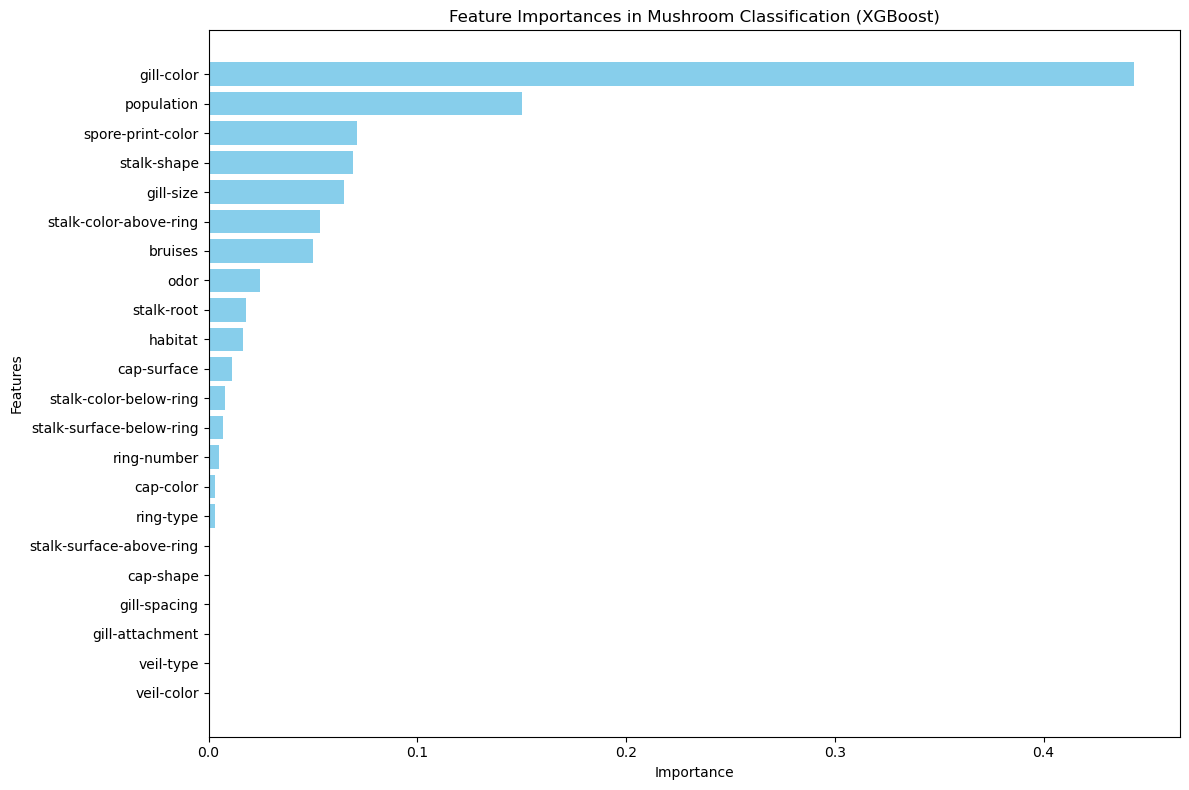

In [201]:
#XGBOOST FEATURE IMPORTANCE ANALYSIS
#NOW going for Feature importance analysis of mushrooms
# data set is already converted into the numeric above 
# splitting the dependent and indepent variale or we can say features and target variable
X = df.drop('class', axis=1) 
y = df['class']
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training the model
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
# Getting importances of feature
feature_importances = xgboost.feature_importances_

# Map feature importances to feature names
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Sorting the feature on the basis of their importance
features_sorted = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the sorted feature 
for feature, importance in features_sorted:
    print(f"{feature}: {importance:.4f}")
# Extract feature names and their importance values for plotting
features = [feature for feature, _ in features_sorted]
importances = [importance for _, importance in features_sorted]

# Ploting feature importances 
plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Mushroom Classification (XGBoost)')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Looking for Data leakage

In [203]:
# Even after hyperparameter tunning and cross validation i got result of 100% 
# Now looking for data leakage
def check_data_leakage(X, y, feature):
    X_leak = X[[feature]]
    
    # splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_leak, y, test_size=0.2, random_state=42)
    
    # AFter splitting the data now the training the model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # now making the predictions 
    y_pred = model.predict(X_test)
    
    # afte prediction now calculating the accuracy 
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# preparing the data by dropping the class from X
X = df.drop('class', axis=1)
y = df['class']

# time for checking the each feature potential leakage by using for loop
for feature in X.columns:
    accuracy = check_data_leakage(X, y, feature)
    print(f"Accuracy using only '{feature}': {accuracy:.4f}")

# now i can for the correlations 
correlation_matrix = df.corr()
perfect_correlations = np.where(np.abs(correlation_matrix) > 0.99)
perfect_correlations = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                        for x, y in zip(*perfect_correlations) if x != y and x < y]
# displaying the results
print("\nPerfect correlations:")
for pair in perfect_correlations:
    print(f"{pair[0]} - {pair[1]}")

Accuracy using only 'cap-shape': 0.5612
Accuracy using only 'cap-surface': 0.5785
Accuracy using only 'cap-color': 0.5969
Accuracy using only 'bruises': 0.7366
Accuracy using only 'odor': 0.9846
Accuracy using only 'gill-attachment': 0.5188
Accuracy using only 'gill-spacing': 0.6203
Accuracy using only 'gill-size': 0.7409
Accuracy using only 'gill-color': 0.8105
Accuracy using only 'stalk-shape': 0.5588
Accuracy using only 'stalk-root': 0.6449
Accuracy using only 'stalk-surface-above-ring': 0.7618
Accuracy using only 'stalk-surface-below-ring': 0.7582
Accuracy using only 'stalk-color-above-ring': 0.7163
Accuracy using only 'stalk-color-below-ring': 0.7058
Accuracy using only 'veil-type': 0.5188
Accuracy using only 'veil-color': 0.5194
Accuracy using only 'ring-number': 0.5305
Accuracy using only 'ring-type': 0.7803
Accuracy using only 'spore-print-color': 0.8708
Accuracy using only 'population': 0.7132
Accuracy using only 'habitat': 0.6751

Perfect correlations:


### Droping the feature Odor and gill-color  and checking the models accuracy

In [205]:


# Remove odor feature
X = df.drop(columns=['class', 'odor','gill-color'])
y = df['class']

# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the  models with the best parameters
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                         min_samples_leaf=1, min_samples_split=2,
                                         random_state=50),
    "RandomForest": RandomForestClassifier(max_depth=None, max_features='sqrt',
                                         min_samples_split=2, n_estimators=50,
                                         random_state=100),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "XGBoost": XGBClassifier(colsample_bytree=0.8, gamma=0, learning_rate=0.2,
                            max_depth=3, subsample=1.0, 
                            use_label_encoder=False, eval_metric='logloss',
                            random_state=200)
}

# Now evaluating the  models
results = []

for name, model in models.items():
    # Training and prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # now time for cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Evaluating the performance of classification model 
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1 (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1 (1)': report['1']['f1-score'],
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# Creating the  comparison of dataframe
results_df = pd.DataFrame(results)
print("Model Performance Comparison Without 'odor' Feature:")
print(results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))

C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mehmo\anaconda3\Lib\site-packages\

Model Performance Comparison Without 'odor' Feature:
                Model  Accuracy  Precision (0)  Recall (0)    F1 (0)  \
0        DecisionTree  1.000000       1.000000    1.000000  1.000000   
1        RandomForest  1.000000       1.000000    1.000000  1.000000   
2             XGBoost  1.000000       1.000000    1.000000  1.000000   
3                 KNN  0.996923       0.995272    0.998814  0.997040   
4                 SVM  0.972923       0.965076    0.983393  0.974148   
5  LogisticRegression  0.951385       0.954762    0.951364  0.953060   
6          GaussianNB  0.874462       0.927711    0.822064  0.871698   

   Precision (1)  Recall (1)    F1 (1)   CV Mean    CV Std  
0       1.000000    1.000000  1.000000  1.000000  0.000000  
1       1.000000    1.000000  1.000000  1.000000  0.000000  
2       1.000000    1.000000  1.000000  1.000000  0.000000  
3       0.998716    0.994885  0.996797  0.996615  0.002041  
4       0.981723    0.961637  0.971576  0.963841  0.003857  
5   